# PROJECT : 
## BIKE SHARING DEMANDS
To build a __multiple linear regression model__ for the prediction of __demand for shared bikes__.  <br>

## PROBLEM STATEMENT :
<br>A __bike-sharing system__ is a service in which bikes are made available for shared use to individuals on a __short term basis__ for a price or free. Many bike share systems allow people to borrow a bike from a __"dock"__ which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.<br><br>
A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a __mindful business plan__ to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. <br><br>
In such an attempt, BoomBikes aspires to __understand the demand for shared bikes__ among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs and stand out from other service providers and make huge profits.<br><br>
For this purpose, the company wants to understand the __factors affecting the demand for these shared bikes__ in the American market and they should know:
> - __Which variables are significant in predicting the demand for shared bikes?__<br>
> - __How well those variables describe the bike demands?__<br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### BUSINESS GOAL : 
We should model the __demand for shared bikes with the available independent variables__. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to __meet the demand__ levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. <br><br>
### Major parts of the project : 
>1. Data understanding
>2. Data cleaning 
>> a. Fixing Rows and Columns<br>
>> b. Check for missing values<br>
>> c. Standardizing values<br>
>> d. Check for outliers<br>
>> e. Derived variables
>3. Exploratory Data Analysis (EDA) 
>4. Model Building
>> a. Data preparation<br>
>> b. Splitting the Data into Training and Testing Sets<br>
>> c. Rescaling the Features using MinMax Scaler<br>
>> d. Building Multiple linear regression model using RFE (Recursive Feature Elimination)<br>
>> e. Residual Analysis of the train dataset<br>
>> f. Making Predictions Using the Final Model<br>
>5. Model Evaluation
>6. Interpretation of results

## Import required libraries

In [2]:
# Importing required libraries for the project

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder

## 1. DATA UNDERSTANDING

### Read the "Bike Sharing" dataset

In [3]:
# Reading the "Bike Sharing" dataset

BikeSharing_df = pd.read_csv("day.csv")

In [4]:
# First 5 records of the dataset

BikeSharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Shape of the dataset(rows,columns)

In [5]:
BikeSharing_df.shape

(730, 16)

#### Column names and their intended meanings
   - __instant__: record index
   - __dteday__ : date
   - __season__ : season (1:Spring, 2:Summer, 3:Fall, 4:Winter)
   - __yr__ : year (0: 2018, 1:2019)
   - __mnth__ : month ( 1 to 12)
   - __holiday__ : whether day is a holiday or not (weekend holiday excluded)
   - __weekday__ : day of the week (0 - Sunday, 1 - Monday, 2 - Tuesday, 3 - Wednesday, 4 - Thursday, 5 - Friday, 6 - Saturday)
   - __workingday__ : if day is neither weekend nor holiday is 1, otherwise is 0.
   - __weathersit__ : 
		- __1__: Clear, Few clouds, Partly cloudy, Partly cloudy
		- __2__: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- __3__: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- __4__: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
   - __temp__ : normal temperature in Celsius
   - __atemp__: Ambient temperature is the air temperature of any object or environment where equipment is stored (in Celsius)
   - __hum__: humidity
   - __windspeed__: wind speed
   - __casual__: count of casual users
   - __registered__: count of registered users
   - __cnt__: count of total rental bikes including both casual and registered

### Basic information of the dataset

In [6]:
BikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Inferences : 
- There are __no missing values__ in the dataset.
- Except the variable - __'dteday'__, all other variables are __numeric__.

### Description of the dataset

In [7]:
BikeSharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. DATA CLEANING

### a. Fixing Rows and Columns

In [8]:
# The variable - 'instant' is just a row index and is of no significance for the analysis
# So the column 'instant' is dropped 

BikeSharing_df = BikeSharing_df.drop("instant", axis = 1)

- The column __'casual'__ describes the count of casual users.
- The column __'registered'__ describes the count of registered users.
- __'cnt'__ is the target variable which is the count of total rental bikes including both casual and registered.

>Obviously __'casual'__ and __'registered'__ variables lead to __data leakage__ in the model.<br>
>This may distort the analysis of other original predictors of the target variable __'cnt'__.<br>
>Hence __drop__ the variables __'casual'__ and __'registered'__.

In [9]:
# Drop the variables 'casual' and 'registered'

BikeSharing_df = BikeSharing_df.drop(['casual','registered'], axis = 1)

In [10]:
# Shape of the dataframe after dropping insignificant columns

BikeSharing_df.shape

(730, 13)

 The values in the column __'weathersit'__ implies the following labels : 
  >__1__    - Clear, Few clouds, Partly cloudy, Partly cloudy<br>
  >__2__    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
  >__3__    - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
  >__4__    - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
 
 __Therefore map the values with meaningful labels associated with them.__

In [11]:
# Mapping the associated labels for the values of 'weathersit' column

BikeSharing_df['weathersit'] = BikeSharing_df['weathersit'].map({1 : "Clear", 2 : "Misty", 3 : "Light Snow or Rain",
                                                                 4 : "Heavy Snow or Rain"})

The values in the column __'season'__ implies the following labels : 
  >__1__    - Spring<br>
  >__2__    - Summer<br>
  >__3__    - Fall<br>
  >__4__    - Winter  
 
 __Therefore map the values with meaningful labels associated with them.__

In [12]:
# Mapping the associated labels for the values of 'season' column

BikeSharing_df['season'] = BikeSharing_df['season'].map({1 : "Spring", 2 : "Summer", 3 : "Fall", 4 : "Winter"})

Map the days of the week in the __'weekday'__ column : 
  >__0__    - Sunday<br>
  >__1__    - Monday<br>
  >__2__    - Tuesday<br>
  >__3__    - Wednesday<br>
  >__4__    - Thursday<br>
  >__5__    - Friday<br>
  >__6__    - Saturday

In [13]:
# Mapping the days of the week in the column 'weekday'

BikeSharing_df['weekday'] = BikeSharing_df['weekday'].map({0 : "Sunday", 1 : "Monday", 2 : "Tuesday", 3 : "Wednesday",
                                                           4 : "Thursday", 5 : "Friday", 6 : "Saturday"})

Map the corresponding months to the numeric values of __'mnth'__ column :
>__1__    - January<br>
>__2__    - February<br>
>__3__    - March<br>
>__4__    - April<br>
>__5__    - May<br>
>__6__    - June<br>
>__7__    - July<br>
>__8__    - August<br>
>__9__    - September<br>
>__10__    - October<br>
>__11__   - November<br>
>__12__   - December

In [14]:
# Mapping the corresponding months in 'mnth' column

BikeSharing_df['mnth'] = BikeSharing_df['mnth'].map({1 : "January", 2 : "February", 3 : "March", 4 : "April", 5 : "May",
                                                     6 : "June", 7 : "July", 8 : "August", 9 : "September",
                                                     10 : "October", 11 : "November", 12 : "December"})

In [15]:
# First 5 records of the dataframe after mapping associated labels

BikeSharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,Spring,0,January,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,Spring,0,January,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


Therefore, some of the __NUMERICAL__ variables are converted to meaningful __CATEGORICAL__ variables.

### b. Recheck for missing values in the dataset

In [16]:
BikeSharing_df.isnull().sum().sum()

0

### c. Standardizing values

In [17]:
# Convert the type of 'dteday' to 'datetime' object

BikeSharing_df['dteday'] = pd.to_datetime(BikeSharing_df['dteday'])

In [18]:
# Pick the columns of 'float' type to round off

roundOff_columns = ['temp','atemp','hum','windspeed']

In [19]:
# Round off float values to 2 decimal places

BikeSharing_df[roundOff_columns] = BikeSharing_df[roundOff_columns].apply(lambda x : round(x,2))

In [20]:
# First 5 records of the dataframe after standardizing values

BikeSharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,January,0,Saturday,0,Misty,14.11,18.18,80.58,10.75,985
1,2018-02-01,Spring,0,January,0,Sunday,0,Misty,14.90,17.69,69.61,16.65,801
2,2018-03-01,Spring,0,January,0,Monday,1,Clear,8.05,9.47,43.73,16.64,1349
3,2018-04-01,Spring,0,January,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,1562
4,2018-05-01,Spring,0,January,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,1600


### d. Check for outliers

In [21]:
# Numeric columns are stored in the variable 'numeric_columns'

numeric_columns = BikeSharing_df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']]

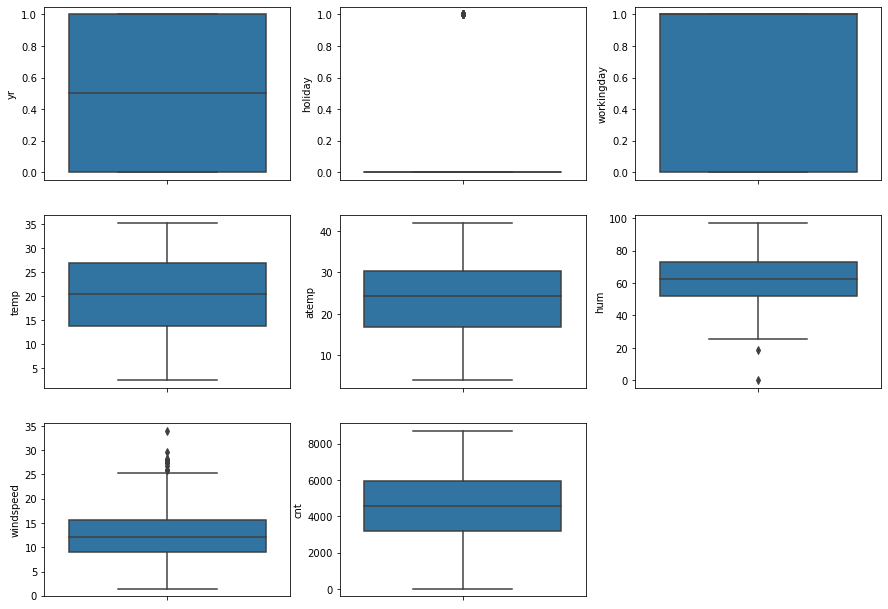

In [22]:
# Boxplots are plotted for numeric columns to check for outliers

plt.figure(figsize=(15,30))
for i in range(len(numeric_columns.columns)):
    plt.subplot(8, 3, i + 1)
    sns.boxplot(y = numeric_columns.columns[i], data = BikeSharing_df)
plt.show()

#### Inference : The columns 'windspeed' and 'hum' seem to have outliers

In [23]:
# Description of 'windspeed' variable to check for outliers

BikeSharing_df['windspeed'].describe()

count    730.000000
mean      12.763699
std        5.195640
min        1.500000
25%        9.040000
50%       12.130000
75%       15.627500
max       34.000000
Name: windspeed, dtype: float64

#### Inference : 
- At __75th percentile__, the value is __15.6275__ but suddenly the value peaks to __34.0000__ at __100th percentile__. 
- This is an indication of an __outlier__ and hence it has to be removed.

In [24]:
# Check at which percentile the value distorts more, so that v can remove the outliers beyond that percentile.

print("At 80%, windspeed is ",BikeSharing_df['windspeed'].quantile(0.80))
print("At 90%, windspeed is ",BikeSharing_df['windspeed'].quantile(0.90))
print("At 95%, windspeed is ",BikeSharing_df['windspeed'].quantile(0.95))
print("At 99%, windspeed is ",BikeSharing_df['windspeed'].quantile(0.99))
print("At 100%,windspeed is ",BikeSharing_df['windspeed'].quantile(1.00))

At 80%, windspeed is  16.642
At 90%, windspeed is  19.83
At 95%, windspeed is  23.0
At 99%, windspeed is  27.382300000000004
At 100%,windspeed is  34.0


In [25]:
# The value distorts more at 100%. So let us drop the records where 'windspeed' > 28.

BikeSharing_df = BikeSharing_df[~ ( BikeSharing_df['windspeed'] > 28 )]

In [26]:
# Description of 'hum' variable to check for outliers

BikeSharing_df['hum'].describe()

count    726.000000
mean      62.864697
std       14.154823
min        0.000000
25%       52.052500
50%       62.710000
75%       73.030000
max       97.250000
Name: hum, dtype: float64

#### Inference : 
- At __0th percentile__, the value is __0.00000__ but suddenly the value increases to __52.0525__ (which is more than 50% of the total interval) at __25th percentile__. 
- This is an indication of an __outlier__ and hence it has to be removed.

In [27]:
# Check at which percentile the value distorts more, so that v can remove the outliers less than that percentile.

print("At 10%,humidity is ",BikeSharing_df['hum'].quantile(0.10))
print("At 5%, humidity is ",BikeSharing_df['hum'].quantile(0.05))
print("At 3%, humidity is ",BikeSharing_df['hum'].quantile(0.03))
print("At 2%, humidity is ",BikeSharing_df['hum'].quantile(0.02))
print("At 1% ,humidity is ",BikeSharing_df['hum'].quantile(0.01))
print("At 0% ,humidity is ",BikeSharing_df['hum'].quantile(0.00))

At 10%,humidity is  45.25
At 5%, humidity is  40.8725
At 3%, humidity is  38.8125
At 2%, humidity is  36.019999999999996
At 1% ,humidity is  31.4225
At 0% ,humidity is  0.0


In [28]:
# The value distorts more between 0% and 1%. So let us drop the records where 'hum' < 31.

BikeSharing_df = BikeSharing_df[~ (BikeSharing_df['hum'] < 31)]

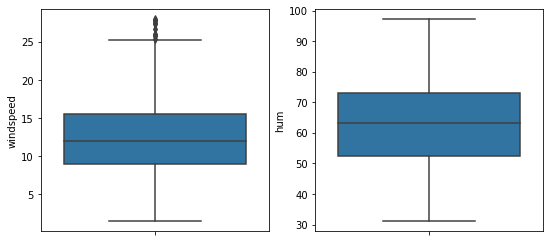

In [29]:
# After removing outliers, recheck the boxplots of 'windspeed' and 'hum'

plt.figure(figsize=(9,9))
plt.subplot(2, 2, 1)
sns.boxplot(y = 'windspeed', data = BikeSharing_df)
plt.subplot(2, 2, 2)
sns.boxplot(y = 'hum', data = BikeSharing_df)
plt.show()

#### Inference - From the boxplots of 'windspeed' and 'hum', it is clear that the outliers are removed

In [30]:
# Shape of the dataframe after removing outliers

BikeSharing_df.shape

(720, 13)

In [31]:
# First 5 records of the dataframe after removing outliers

BikeSharing_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2018-01-01,Spring,0,January,0,Saturday,0,Misty,14.11,18.18,80.58,10.75,985
1,2018-02-01,Spring,0,January,0,Sunday,0,Misty,14.90,17.69,69.61,16.65,801
2,2018-03-01,Spring,0,January,0,Monday,1,Clear,8.05,9.47,43.73,16.64,1349
3,2018-04-01,Spring,0,January,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,1562
4,2018-05-01,Spring,0,January,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,1600


### e. Derived Variables 

In [32]:
# Extract 'day' from 'dteday'

BikeSharing_df['day'] = BikeSharing_df['dteday'].dt.day

In [33]:
# Since we have day, month and year of the record in separate columns, drop the variable 'dteday' which is redundant

BikeSharing_df = BikeSharing_df.drop("dteday", axis = 1)

- __Categorize__ the days of a month as __'Beginning of Month', 'Mid Month' and 'End of Month'__ each of which holds number of days with the interval : __[0,10],[10,20],[20-31]__ respectively
- __Binning__ is used to bucket the days of the month

In [34]:
BikeSharing_df['day'] = pd.cut( x = BikeSharing_df['day'], bins = [0,10,20,31] )
BikeSharing_df['day'] = BikeSharing_df['day'].cat.codes
BikeSharing_df['day'] = BikeSharing_df['day'].map({0 : "Beginning of Month", 1 : "Mid Month", 2 : "End of Month"})

In [35]:
# First 5 records of the dataframe after binning the 'day' variable

BikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,Spring,0,January,0,Saturday,0,Misty,14.11,18.18,80.58,10.75,985,Beginning of Month
1,Spring,0,January,0,Sunday,0,Misty,14.90,17.69,69.61,16.65,801,Beginning of Month
2,Spring,0,January,0,Monday,1,Clear,8.05,9.47,43.73,16.64,1349,Beginning of Month
3,Spring,0,January,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,1562,Beginning of Month
4,Spring,0,January,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,1600,Beginning of Month


## 3. Exploratory Data Analysis (EDA)

### Continuous variables of the dataframe : 
- yr
- holiday
- workingday
- temp
- atemp
- hum
- windspeed
- __cnt (target variable)__

### Categorical variables of the dataframe :
- season
- day
- mnth
- weathersit
- weekday

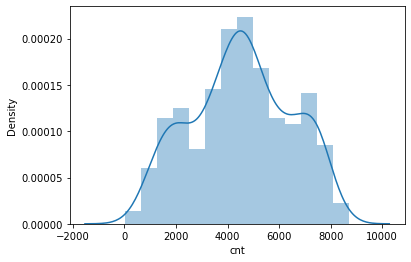

In [36]:
# Distribution plot for the target variable 'cnt'

sns.distplot(BikeSharing_df['cnt'])
plt.show()

#### Inference - Average demand for shared bikes for the year 2018 - 2019 seems to be around 4000 - 5000

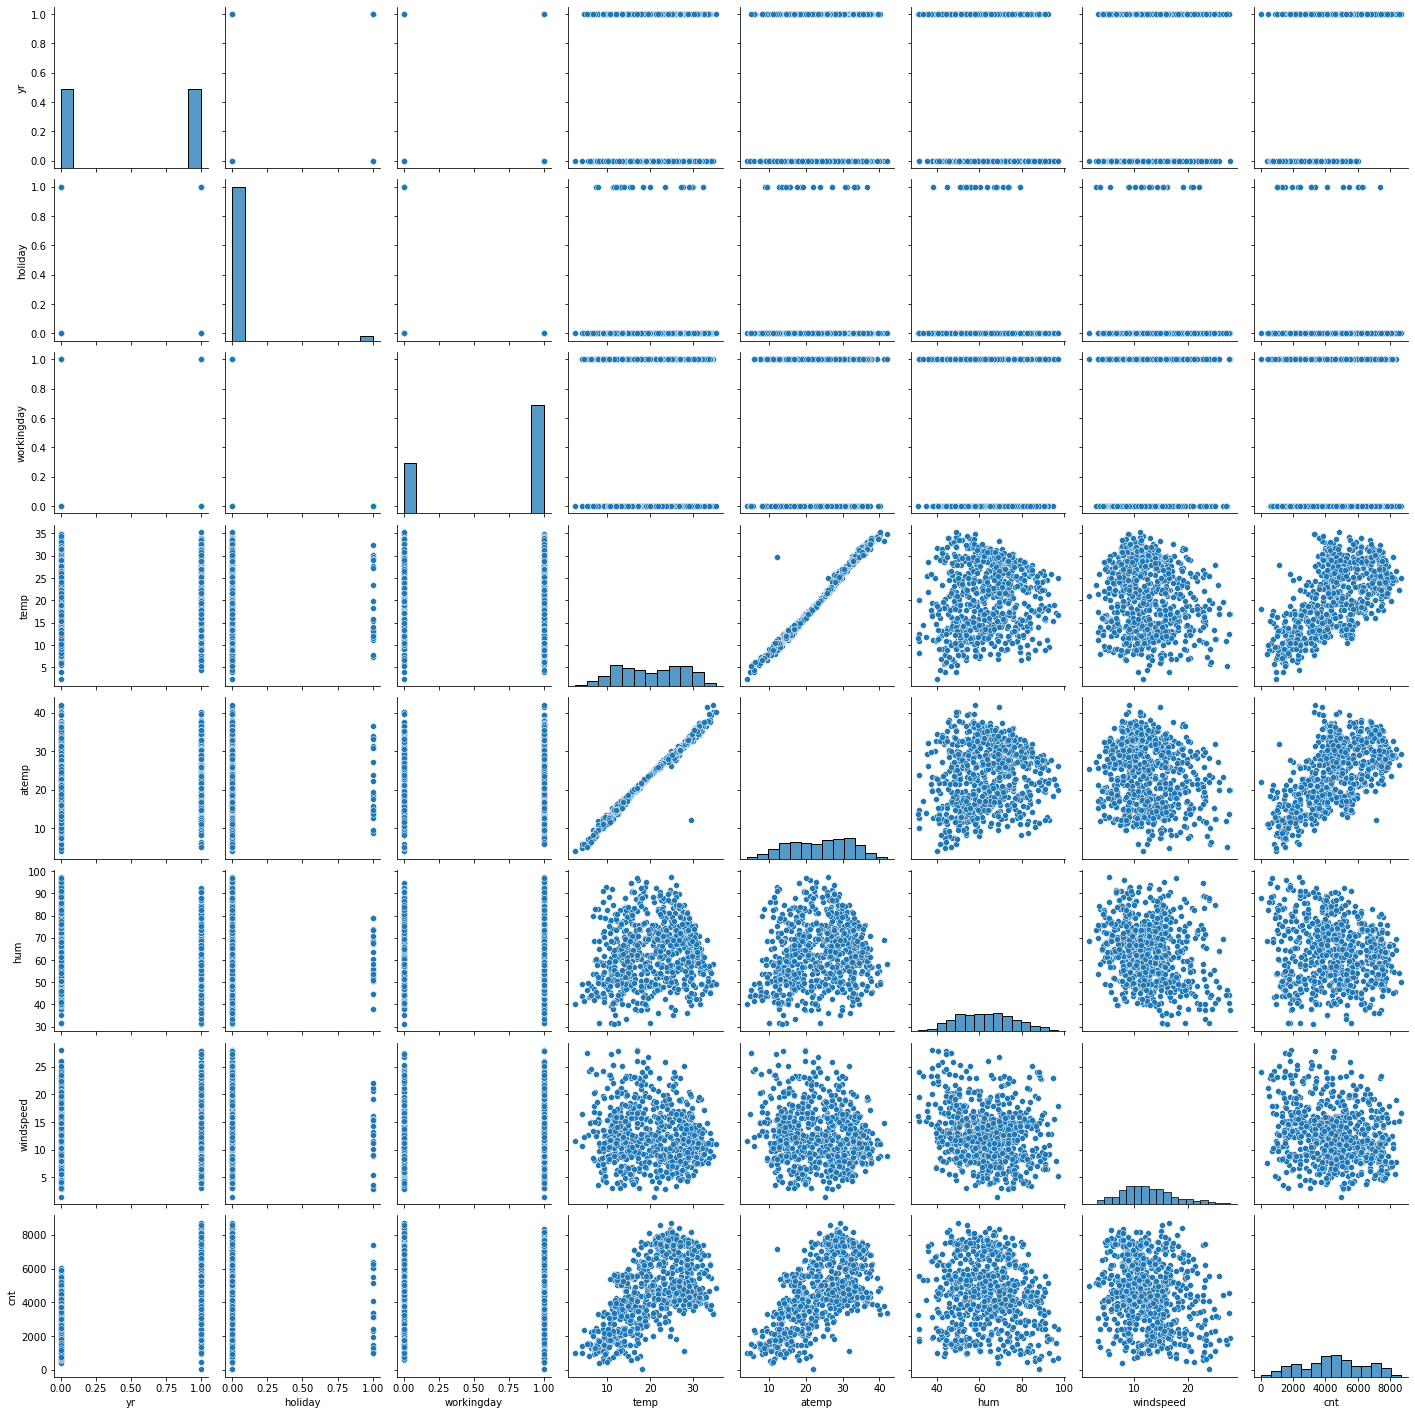

In [37]:
# Pairplots are used to learn the relationship between numerical variables of BikeSharing_df

sns.pairplot(BikeSharing_df)
plt.show()

#### Inferences : 
- The variables __'temp'__ and __'atemp'__ are __correlated__.
- __'temp'__ and __'atemp'__ show similar kind of relationship with all other variables.
- __'temp' and 'cnt'__ variables are related linearly and also __'atemp' and 'cnt'__ have linear relationship.
- __yr - 2019__ shows relatively higher demand for shared bikes compared to the __yr - 2018__.
- From the histogram of __'holiday'__, it is evident that demand for shared bikes seems to be more for __non - holiday__ days.
- Similarly, histogram of __'workingday'__ shows that the demand falls for __non - working days__.

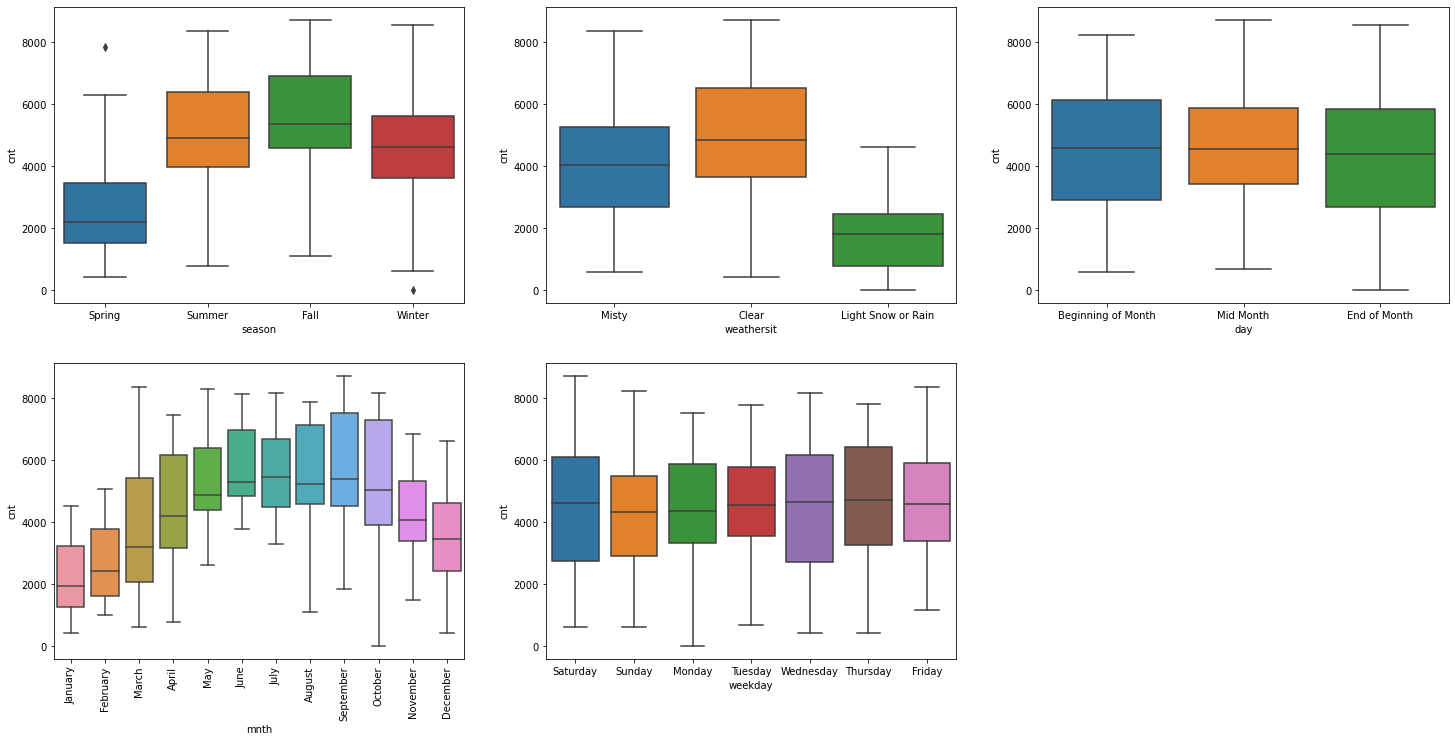

In [38]:
# Boxplots are used here to learn the relationship of categorical variables with the target variable 'cnt'

plt.figure(figsize = (25,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BikeSharing_df)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BikeSharing_df)
plt.subplot(2,3,3)
sns.boxplot(x = 'day', y = 'cnt', data = BikeSharing_df)
plt.subplot(2,3,4)
plt.xticks(rotation = 90)
sns.boxplot(x = 'mnth', y = 'cnt', data = BikeSharing_df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = BikeSharing_df)
plt.show()

#### Inferences : 
- Comparatively __'Fall'__ season has more demand for shared bikes and __'Spring'__ season has lesser demand.
- If the weather is __'Clear'__, then the demand for shared bikes is __high__.
- __'Beginning of Month'__ shows a __little higher__ demand for rental bikes compared to other days of the month.
- During __Snow or Rain__, most probably people __dont prefer__ shared bikes. 
- The demand for shared bikes is lesser for __Sundays__ compared to other weekdays.
- Demand for shared bikes is typically __high__ in the __mid of the year__ and is relatively __low__ towards the __beginning__ and __end__ of the year.
- __Thursdays__ seem to have comparatively higher demand for rental bikes.
- In the month of __'September'__, the demand seems to __high__ but for the month of __'January'__, the demand __drops__.

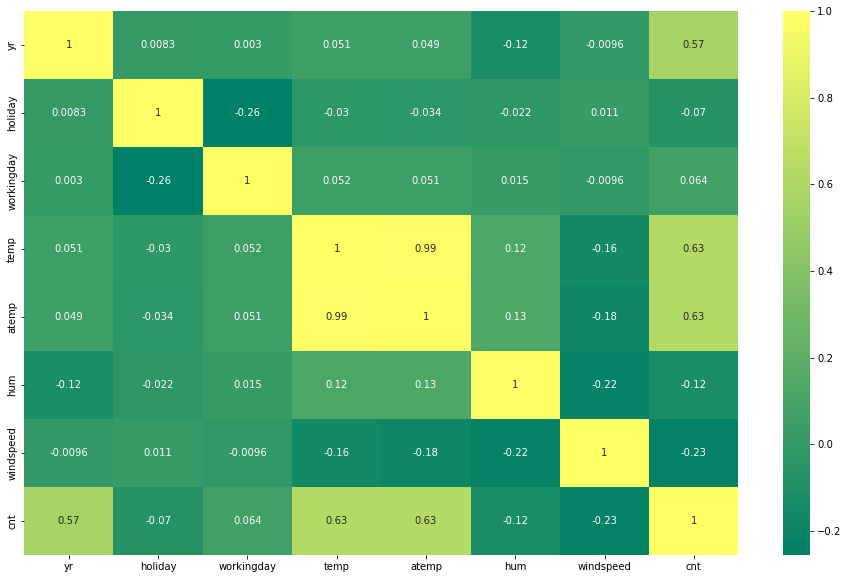

In [39]:
# Analysing the correlation of numeric variables in BikeSharing_df

plt.figure(figsize = (16,10))
sns.heatmap(BikeSharing_df.corr(), annot = True, cmap = "summer")
plt.show()

#### Inferences :
- The target variable __'cnt'__ is __positively__ correlated with __'yr', 'workingday', 'temp'__ and __'atemp'__.
- The target variable __'cnt'__ is __negatively__ correlated with __'holiday', 'hum'__ and __'windspeed'__. 
- __'temp'__ and __'atemp'__ variables are __strongly__ correlated.

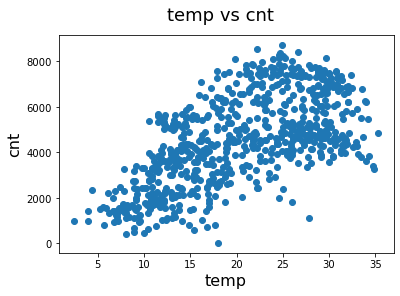

In [40]:
#Scatter plot for 'temp' vs 'cnt'

fig = plt.figure()
plt.scatter(BikeSharing_df['temp'],BikeSharing_df['cnt'])
fig.suptitle('temp vs cnt', fontsize = 18)             
plt.xlabel('temp', fontsize = 16)                          
plt.ylabel('cnt', fontsize = 16)   
plt.show()

#### Inferences :
- __'temp'__ is __positively__ correlated with the target variable __'cnt'__.
- As __'temp'__ increases, demand for shared bikes also __increases__ but when the __'temp'__ exceeds 30, the demand __drops__.

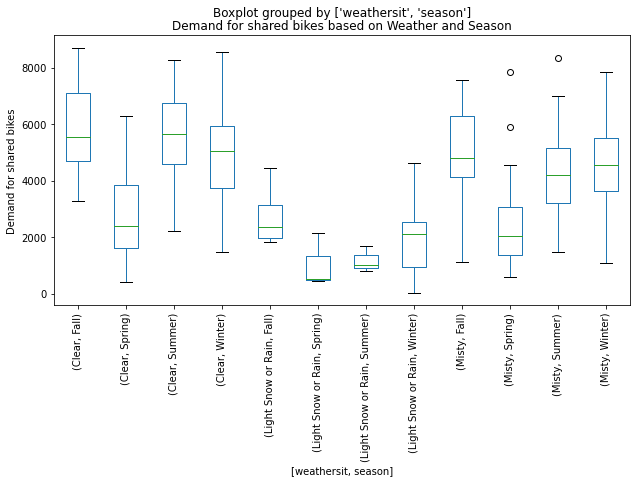

In [41]:
# Analysing how demand varies based on Weather and Season together using boxplots

BikeSharing_df.boxplot(by=['weathersit','season'], column='cnt', figsize=(10,5), grid = False)
plt.xticks(rotation=90)
plt.title("Demand for shared bikes based on Weather and Season")
plt.ylabel("Demand for shared bikes")
plt.show()

#### Inferences:
- __Irrespective of the season__, if there is __rain or snow__, the demand for rental bikes __drops__.
- Higher demands of shared bikes seem to occur during __'Fall'__ season when the weather is __Clear__.

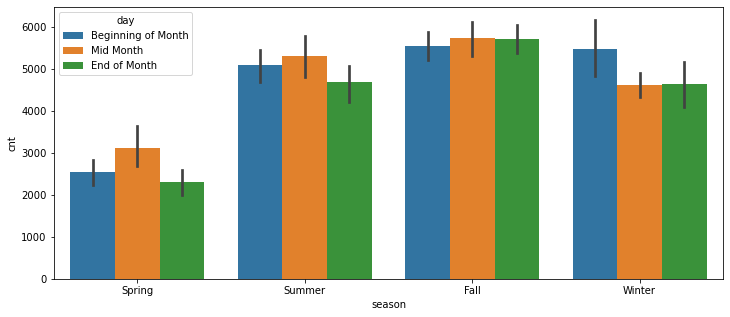

In [42]:
# Barplot to analyse how season and days of a month impact the demand for shared bikes

plt.figure(figsize = (12, 5))
sns.barplot(x = 'season', y = 'cnt', hue = 'day', data = BikeSharing_df)
plt.show()

#### Inferences :
- The demand is relatively low during __'End of Month'__.
- During __'Spring'__ season, the demand for rental bikes is low across the month, compared to other seasons.
- For __'Winter'__ season, the demand is high in the __'Beginning of Month'__ rather than other days of the month. This may be due to the transition in the season from __'Fall'__ to __'Winter'__.

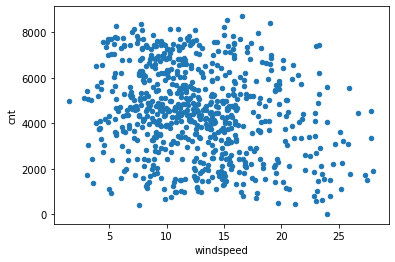

In [43]:
# Scatter plot of 'windspeed' and 'cnt'

BikeSharing_df.plot(kind="scatter", x="windspeed", y="cnt" )
plt.show()

#### Inferences : 
- From the scatter plot, it is evident that the demand for shared bikes is __more__ when the __'windspeed' < 15__.
- As the __'windspeed'__ increases, the demand drops. 

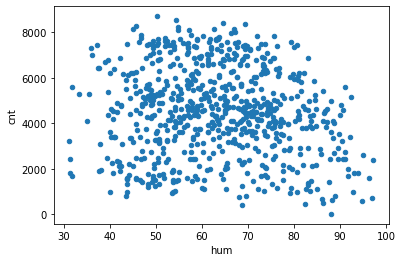

In [44]:
# Scatter plot of 'hum' and 'cnt'

BikeSharing_df.plot(kind="scatter", x="hum", y="cnt" )
plt.show()

#### Inferences :
- The bike-sharing demand is __high__ for the __humidity__ range of __[40 - 80]__.
- Beyond this interval of humidity range, the demand drops.

### Insights obtained as a result of EDA : 
- The variables __'temp'__ and __'atemp'__ are __strongly__ correlated and hence they show similar kind of relationship with all other variables.
- __'temp'__ is __positively__ correlated with the target variable __'cnt'__. As __'temp'__ increases, demand for shared bikes also __increases__ but when the __'temp'__ exceeds 30, the demand __drops__.
- __yr - 2019__ shows relatively good demand for shared bikes compared to the __yr - 2018__.
- From the histogram of __'holiday'__, it is evident that demand for shared bikes seems to be more for __non - holiday__ days.
- Similarly, histogram of __'workingday'__ shows that the demand falls for __non - working days__.
- Comparatively __'Fall'__ season has more demand for shared bikes and __'Spring'__ season has lesser demand.
- If the weather is __'Clear'__, then the demand for shared bikes is __high__.
- During __Snow or Rain__, most probably people __dont prefer__ shared bikes. 
- The demand for shared bikes is lesser for __Sundays__ compared to other weekdays.
- In the month of __'September'__, the demand seems to __high__ but for the month of __'January'__, the demand __drops__.
- Demand for rental bikes seems to be high on __Thursdays__ rather than other weekdays.
- Demand for shared bikes is typically __high__ in the __mid of the year__ and is relatively __low__ towards the __beginning__ and __end__ of the year.
- Heatmap shows that __'cnt'__ variable is __positively__ correlated with __'yr', 'workingday', 'temp' and 'atemp'__ and __negatively__ correlated with __'holiday', 'hum' and 'windspeed'__.
- __Irrespective of the season__, if there is __rain or snow__, the demand for rental bikes __drops__.
- Higher demands of shared bikes seem to occur during __'Fall'__ season when the weather is __Clear__.
- The demand is relatively low during __'End of Month'__.
- During __'Spring'__ season, the demand for rental bikes is low across the month, compared to other seasons.
- For __'Winter'__ season, the demand is high in the __'Beginning of Month'__ rather than other days of the month. This may be due to the transition in the season from __'Fall'__ to __'Winter'__.
- The bike-sharing demand is __high__ for the __humidity__ range of __[40 - 80]__.
- Demand for shared bikes is __more__ when the __'windspeed' < 15__.

## 4. MODEL BUILDING

From the __visualization__ of data, it is evident that some of the features have __linear relationship__ with the __target variable 'cnt'__. <br>Hence, a __Multiple Linear Regression model__ can be built to __predict the demand__ for shared bikes.

### Assumptions of a linear regression model

Before building the model, let us assume that

1. __Linear relationship__ exists between X and Y
2. Error terms are __normally__ distributed
3. Error terms are __independent__ to each other
4. Error terms have __constant variance (homoscedasticity)__


### a. Data Preparation

In [45]:
# First 5 records of the dataframe

BikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
0,Spring,0,January,0,Saturday,0,Misty,14.11,18.18,80.58,10.75,985,Beginning of Month
1,Spring,0,January,0,Sunday,0,Misty,14.90,17.69,69.61,16.65,801,Beginning of Month
2,Spring,0,January,0,Monday,1,Clear,8.05,9.47,43.73,16.64,1349,Beginning of Month
3,Spring,0,January,0,Tuesday,1,Clear,8.20,10.61,59.04,10.74,1562,Beginning of Month
4,Spring,0,January,0,Wednesday,1,Clear,9.31,11.46,43.70,12.52,1600,Beginning of Month


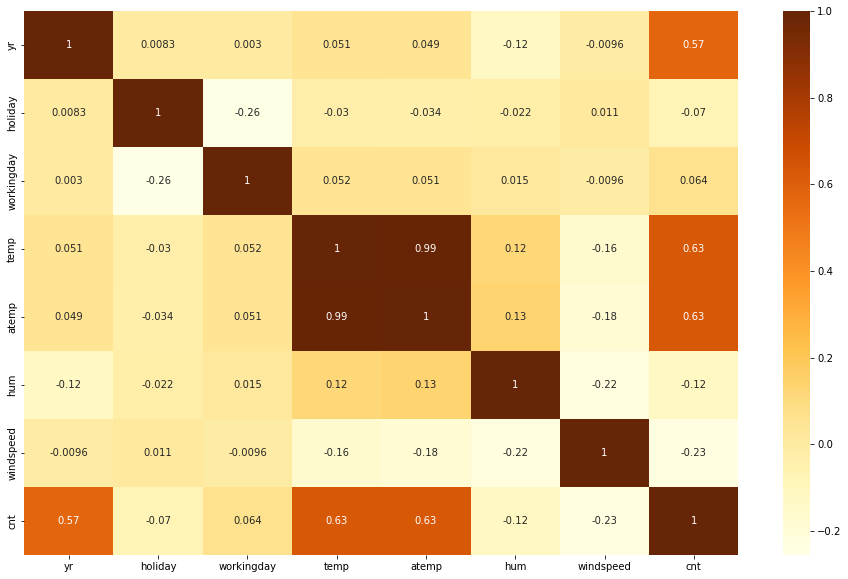

In [46]:
# Analysing the correlation of numeric variables in BikeSharing_df

plt.figure(figsize = (16,10))
sns.heatmap(BikeSharing_df.corr(), annot = True, cmap = "YlOrBr")
plt.show()

#### Inference :
From the heatmap, it is clear that the variables __'temp'__ and __'atemp'__ are strongly __correlated__. Thus, to resolve __multicollinearity__ issue in model building , drop one of the redundant features __'atemp'__ from the dataset.

In [47]:
# Drop the feature 'atemp' to avoid multicollinearity

BikeSharing_df = BikeSharing_df.drop("atemp", axis = 1)

In [48]:
# Shape of the dataframe after removing redundant features

BikeSharing_df.shape

(720, 12)

In [49]:
# First 5 records of the dataframe

BikeSharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,Spring,0,January,0,Saturday,0,Misty,14.11,80.58,10.75,985,Beginning of Month
1,Spring,0,January,0,Sunday,0,Misty,14.90,69.61,16.65,801,Beginning of Month
2,Spring,0,January,0,Monday,1,Clear,8.05,43.73,16.64,1349,Beginning of Month
3,Spring,0,January,0,Tuesday,1,Clear,8.20,59.04,10.74,1562,Beginning of Month
4,Spring,0,January,0,Wednesday,1,Clear,9.31,43.70,12.52,1600,Beginning of Month


>__DEPENDENT VARIABLE (TARGET VARIABLE) : cnt__

>__INDEPENDENT VARIABLES (PREDICTORS) :__ 
>- day
>- yr
>- mnth
>- season
>- weathersit
>- holiday
>- weekday
>- workingday
>- temp
>- hum
>- windspeed

### One hot encoding for categorical features

- __One hot encoding__ can be defined as the essential process of __converting the categorical data variables__ to be provided to machine and deep learning algorithms which in turn __improve predictions__ as well as __classification accuracy__ of a model.<br><br>
- This encoding ensures that machine learning __does not assume that higher numbers are more important__.<br><br>
- __One hot encoding__ is similar to __dummy encoding__ but for quick __data cleaning and EDA__, it is preferred to use __pandas 'get_dummies'__ and to transform a categorical column to multiple binary columns for __machine learning__, it's better to use __OneHotEncoder()__. Also we can __encode a string or an integer__ using __One Hot Encoder__ whereas we can only create __dummy variables for integers__ using __get_dummies__ of pandas.<br><br>
- One hot encoding does the same things as get dummies but in addition, it __saves__ the exploded categories into it’s __object__. Saving exploded categories is extremely useful when the __same data pre-processing__ has to be applied on the test set.


In [50]:
# Adding categorical variables of BikeSharing_df to 'BikeSharing_Categorical'

BikeSharing_Categorical = ['season','weathersit','day','weekday','mnth']

__Creating an object for OneHotEncoder() and dropping the first dummy variable created so that multicollinearity issue doesnot impact the interpretation of the model.__

In [51]:
ohe_obj  =  OneHotEncoder(sparse = False, drop = 'first')

In [52]:
# Create dummies for categorical variables of BikeSharing_df using 'OneHotEncoder' and store it in 'OHE_Array'

OHE_Array = ohe_obj.fit_transform(BikeSharing_df[BikeSharing_Categorical])

In [53]:
# Convert the array to Dataframe 'OHE_DF' with index of BikeSharing_df

OHE_DF = pd.DataFrame(OHE_Array, index = BikeSharing_df.index)

In [54]:
# Rename the columns of dummy variables with meaningful feature names

OHE_DF.columns = ohe_obj.get_feature_names()

OHE_DF = OHE_DF.rename(columns = lambda x : x[3:])    

In [55]:
# First 5 records of OHE_DF

OHE_DF.head()

,Spring,Summer,Winter,Light Snow or Rain,Misty,End of Month,Mid Month,Monday,Saturday,Sunday,...,December,February,January,July,June,March,May,November,October,September
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Drop the categorical columns from BikeSharing_df and store the rest of the numerical columns in 'BikeSharing_Numerical'

BikeSharing_Numerical = BikeSharing_df.drop(columns = BikeSharing_Categorical)

In [57]:
# Concatenate the numerical variables with OHE_DF dataframe

BikeSharing = pd.concat([OHE_DF, BikeSharing_Numerical], axis=1)

In [58]:
# Shape of the dataframe after concatenating one hot encoded variables

BikeSharing.shape

(720, 31)

In [59]:
# First 5 records of the dataframe after concatenating one hot encoded variables

BikeSharing.head()

,Spring,Summer,Winter,Light Snow or Rain,Misty,End of Month,Mid Month,Monday,Saturday,Sunday,...,November,October,September,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0,0,0,14.11,80.58,10.75,985
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0,0,0,14.90,69.61,16.65,801
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,8.05,43.73,16.64,1349
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,8.20,59.04,10.74,1562
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,9.31,43.70,12.52,1600


#### Now all the columns have numerical values so that we can easily use it for the machine learning process.

### b. Splitting the Data into Training and Testing Sets

In [60]:
# We specify random_state so that the train and test data set always have the same set of split each time

df_train, df_test = train_test_split(BikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### c. Rescaling the Features using MinMax Scaler

In [61]:
# Create an instance of scaler

scaler = MinMaxScaler()

In [62]:
# Apply scaler() to the columns 'temp','hum','windspeed','cnt'

scale_vars = ['temp','hum','windspeed','cnt']

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

In [63]:
# First 5 records of the training dataset after scaling
# All values of the training set ranges from 0 to 1

df_train.head()

,Spring,Summer,Winter,Light Snow or Rain,Misty,End of Month,Mid Month,Monday,Saturday,Sunday,...,November,October,September,yr,holiday,workingday,temp,hum,windspeed,cnt
423,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0.379938,0.123956,0.435245,0.499425
728,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,0,0,0.249074,0.256874,0.835549,0.204096
482,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1,0,0,0.401852,0.266444,0.273832,0.482973
114,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0.692901,0.702567,0.414736,0.466061
582,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0.877469,0.516482,0.272313,0.804303


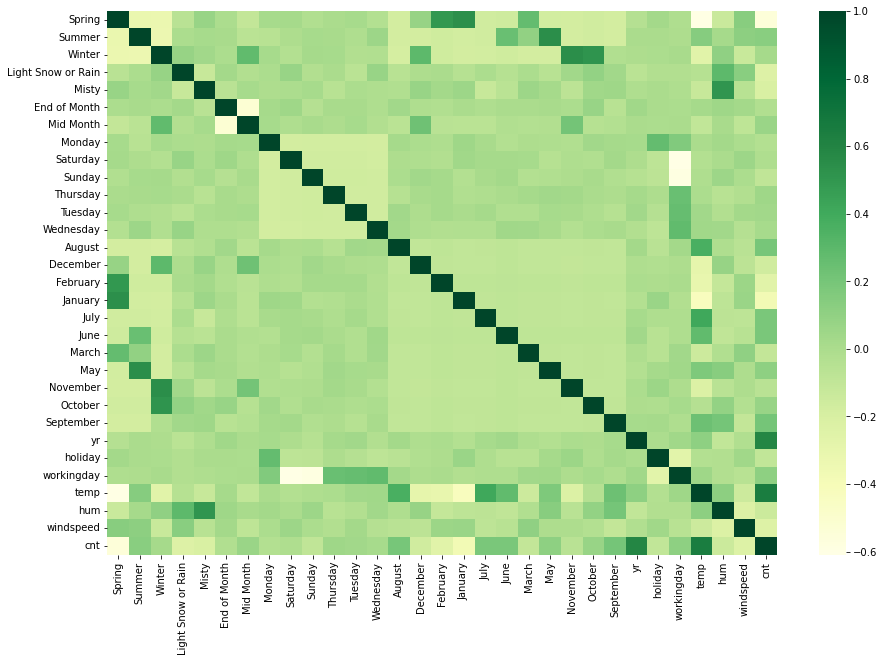

In [64]:
# Analysing the correlation of variables in df_train

plt.figure(figsize = (15,10))
sns.heatmap(df_train.corr(), cmap = "YlGn")
plt.show()

#### Inference -  Some of the predictors seem to be dependent on each other slightly, which can be resolved by calculating VIF values and dropping the redundant features during model building.<br>

#### Defining 'X' (INDEPENDENT VARIABLES) and 'Y' (DEPENDENT VARIABLE) for model building

In [65]:
y_train = df_train.pop("cnt")
X_train = df_train

In [66]:
# Features selected for RFE (Recursive Feature Elimination)

X_train.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'End of Month', 'Mid Month', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'August', 'December', 'February', 'January',
       'July', 'June', 'March', 'May', 'November', 'October', 'September',
       'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

### d. Building Multiple linear regression model using RFE (Recursive Feature Elimination)

### MODEL 1

We use __LinearRegression__ function from __SciKit Learn__ for its compatibility with RFE 

In [67]:
# Creating an instance of LinearRegression and fitting a line

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [68]:
# Running RFE with output number of variables equal to 20

rfe = RFE(lr, 20)             
rfe = rfe.fit(X_train, y_train)

In [69]:
# printing the list of predictors with its rfe ranking and support values

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Light Snow or Rain', True, 1),
 ('Misty', True, 1),
 ('End of Month', False, 10),
 ('Mid Month', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', False, 4),
 ('Wednesday', False, 7),
 ('August', False, 11),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 5),
 ('March', False, 9),
 ('May', False, 3),
 ('November', True, 1),
 ('October', False, 6),
 ('September', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [70]:
# Storing the features selected by RFE in 'col'

col = X_train.columns[rfe.support_]
col

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'Sunday', 'December', 'February', 'January',
       'July', 'November', 'September', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [71]:
# Features eliminated by RFE

X_train.columns[~rfe.support_]

Index(['End of Month', 'Monday', 'Thursday', 'Tuesday', 'Wednesday', 'August',
       'June', 'March', 'May', 'October'],
      dtype='object')

In [72]:
# Function for building linear model using 'statsmodels'

def stats_model_building(columns):
    X_train_set = X_train[columns]             # Creating 'X_train_set' dataframe with selective predictors
    X_train_set = sm.add_constant(X_train_set) # Adding a constant variable
    lm = sm.OLS(y_train,X_train_set).fit()     # Fitting the line using 'statsmodels' obj
    print(lm.summary())                        # prints the summary statistics of the model
    return lm                                  # returns lm


In [73]:
# Function for calculating VIF (variance_inflation_factor) 
# VIF is used for detecting multicollinearity among predictors

def calculate_VIF(X_train_set):
    vif = pd.DataFrame()
    vif['Features'] = X_train_set.columns
    vif['VIF'] = [variance_inflation_factor(X_train_set.values, i) for i in range(X_train_set.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Re-building the RFE model using 'statsmodels' for detailed statistics

In [74]:
# Building a multiple linear regression model using 'statsmodels' with the features selected by RFE

lm_1 = stats_model_building(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.33e-185
Time:                        09:14:22   Log-Likelihood:                 506.28
No. Observations:                 503   AIC:                            -972.6
Df Residuals:                     483   BIC:                            -888.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2293      0

#### Inferences from Summary statistics of Model 1 :
- __R-Squared__ value for __Model 1__ is __0.850__
- __Adjusted R-Squared__ value for __Model 1__ is __0.844__
- __Prob (F-statistic):	3.33e-185__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, Sunday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, February, January, July, November, holiday, hum, windspeed__
- Features with __p-value > 0.05__ (Significance level) : holiday __(0.729)__, July __(0.139)__, February __(0.051)__

In [75]:
# Variable Inflation Factor is used to detect multicollinearity among predictor variables
# Calculate VIF for the predictor variables of Model 1

calculate_VIF(X_train[col])

,Features,VIF
16,workingday,50.90
6,Saturday,11.31
7,Sunday,10.92
0,Spring,5.84
17,temp,4.89
2,Winter,3.92
15,holiday,3.48
1,Summer,2.82
10,January,2.43
18,hum,2.12


#### Inference - VIF values are too high ( i.e. > 5) for the features 'workingday' - 50.90, 'Saturday' - 11.31, 'Sunday' - 10.92, 'Spring' - 5.84

- __p - value__ of the feature __holiday = 0.729__ which is greater than the significance level of __alpha = 0.05__
- The feature __'workingday'__ has the highest __VIF__ of 50.90
- When both the __'p - value' and 'VIF'__ are higher than the tolerance level, improvement in __significance__ is given priority
- So drop the feature __'holiday'__ and re-build the __Model 2__ using 'statsmodels'

In [76]:
# Drop the feature 'holiday' from the dataframe of selected predictor variables

X_train_model_2 = X_train[col].drop("holiday", axis = 1)

In [77]:
# Selected features for Model 2

X_train_model_2.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'Sunday', 'December', 'February', 'January',
       'July', 'November', 'September', 'yr', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

### MODEL 2

In [78]:
# Re-build the model using 'statsmodels' after removing the feature 'holiday' from Model 1

lm_2 = stats_model_building(X_train_model_2.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.33e-185
Time:                        09:14:22   Log-Likelihood:                 506.28
No. Observations:                 503   AIC:                            -972.6
Df Residuals:                     483   BIC:                            -888.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2223      0

#### Inferences from Summary statistics of Model 2 :
- __R-Squared__ value for __Model 2__ is __0.850__
- __Adjusted R-Squared__ value for __Model 2__ is __0.844__
- R-Squared and Adjusted R-Squared values __remain the same__ even after removing the feature 'holiday' from Model 1
- __Prob (F-statistic):	3.33e-185__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, Sunday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, February, January, July, November, hum, windspeed__
- No change in signs of coefficients compared to previous model
- Features with __p-value > 0.05__ (Significance level) : July __(0.139)__, February __(0.051)__

In [79]:
# Calculate VIF for the predictor variables of Model 2

calculate_VIF(X_train_model_2)

,Features,VIF
16,temp,17.68
15,workingday,15.59
17,hum,13.56
18,windspeed,6.06
0,Spring,5.77
6,Saturday,4.01
2,Winter,4.00
7,Sunday,3.92
1,Summer,2.83
4,Misty,2.69


####  Inference - VIF values are reduced slightly compared to previous model. Features with VIF > 5 : ' temp' - 17.68, 'workingday' - 15.59, 'hum' - 13.56, 'windspeed' - 6.06, 'Spring' - 5.77

- __p - value__ of the feature __July = 0.139__ which is greater than the significance level of __alpha = 0.05__
- The feature __'temp'__ has the highest __VIF__ of 17.68
- When both the __'p - value' and 'VIF'__ are higher than the tolerance level, improvement in __significance__ is given priority
- So drop the feature __'July'__ and re-build the __Model 3__ using 'statsmodels'

In [80]:
# Drop the feature 'July' from the dataframe of selected predictor variables

X_train_model_3 = X_train_model_2.drop("July", axis = 1)

In [81]:
# Selected features for Model 3

X_train_model_3.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'Sunday', 'December', 'February', 'January',
       'November', 'September', 'yr', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

### MODEL 3

In [82]:
# Re-build the model using 'statsmodels' after removing the feature 'July' from Model 2

lm_3 = stats_model_building(X_train_model_3.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     151.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.92e-186
Time:                        09:14:22   Log-Likelihood:                 505.14
No. Observations:                 503   AIC:                            -972.3
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2166      0

#### Inferences from Summary statistics of Model 3 :
- __R-Squared__ value for __Model 3__ is __0.850__
- __Adjusted R-Squared__ value for __Model 3__ is __0.844__
- R-Squared and Adjusted R-Squared values __remain the same__ even after removing the feature 'July' from Model 2
- __Prob (F-statistic):	7.92e-186__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, Sunday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, February, January, November, hum, windspeed__
- No change in signs of coefficients compared to previous model
- No features with __p-value > 0.05__ (Significance level)

In [83]:
# Calculate VIF for the predictor variables of Model 3

calculate_VIF(X_train_model_3)

,Features,VIF
15,temp,16.16
14,workingday,15.57
16,hum,13.52
17,windspeed,6.06
0,Spring,5.59
6,Saturday,4.00
7,Sunday,3.91
2,Winter,3.79
4,Misty,2.69
1,Summer,2.45


#### Inference - VIF values are reduced slightly compared to previous model. Features with VIF > 5 : ' temp' - 16.16, 'workingday' - 15.57, 'hum' - 13.52, 'windspeed' - 6.06, 'Spring' - 5.59

- No __p - values__ of the features are greater than the significance level of __alpha = 0.05__
- The feature __'temp'__ has the highest __VIF__ of 16.16
- Thus, in order to improve the VIF values and __resolve the multicollinearity__ issue, let us drop the feature __'temp'__ and re-build the __Model 4__ using 'statsmodels'

In [84]:
# Drop the feature 'temp' from the dataframe of selected predictor variables

X_train_model_4 = X_train_model_3.drop("temp", axis = 1)

In [85]:
# Selected features for Model 4

X_train_model_4.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'Sunday', 'December', 'February', 'January',
       'November', 'September', 'yr', 'workingday', 'hum', 'windspeed'],
      dtype='object')

### MODEL 4

In [86]:
# Re-build the model using 'statsmodels' after removing the feature 'temp' from Model 3

lm_4 = stats_model_building(X_train_model_4.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.34e-163
Time:                        09:14:22   Log-Likelihood:                 448.48
No. Observations:                 503   AIC:                            -861.0
Df Residuals:                     485   BIC:                            -785.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5423      0

#### Inferences from Summary statistics of Model 4 :
- __R-Squared__ value for __Model 4__ is __0.812__
- __Adjusted R-Squared__ value for __Model 4__ is __0.805__
- R-Squared and Adjusted R-Squared values __decreased__ after removing the feature 'temp' from Model 3
- __Prob (F-statistic):	2.34e-163__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Mid Month, Saturday, Sunday, September, yr, workingday__
- Features with __Negative__ coefficients : __Summer, Winter, Spring, Light Snow or Rain, Misty, December, February, January, July, November, hum, windspeed__
- The features __'Summer' and 'Winter'__ have changed their signs of coefficients from __positive to negative__
- Features with __p-value > 0.05__ (Significance level) : Winter __(0.318)__, Sunday __(0.153)__

In [87]:
# Calculate VIF for the predictor variables of Model 4

calculate_VIF(X_train_model_4)

,Features,VIF
15,hum,10.28
14,workingday,9.45
16,windspeed,5.56
0,Spring,4.60
2,Winter,3.21
6,Saturday,2.82
7,Sunday,2.81
4,Misty,2.48
10,January,2.22
1,Summer,2.17


#### Inference - VIF values are reduced slightly compared to previous model. Features with VIF > 5 : 'hum' - 10.28, 'workingday' - 9.45, 'hum' - 13.52, 'windspeed' - 5.56

- Since the __coefficients of 'Summer' and 'Winter' have changed signs__, Model 4 is __not stable__.
- Therefore, instead of dropping the feature 'temp' from Model 3, __drop the feature 'workingday'__ which has the next highest VIF value of 15.57 and re-build the __Model 4.1__ using 'statsmodels'

In [88]:
# Drop the feature 'workingday' from the dataframe of selected predictor variables

X_train_model_4 = X_train_model_3.drop("workingday", axis = 1)

In [89]:
# Selected features for Model 4.1

X_train_model_4.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'Sunday', 'December', 'February', 'January',
       'November', 'September', 'yr', 'temp', 'hum', 'windspeed'],
      dtype='object')

### MODEL 4.1

In [90]:
# Re-build the model using 'statsmodels' after removing the feature 'workingday' from Model 3 

lm_4 = stats_model_building(X_train_model_4.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     154.4
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.45e-183
Time:                        09:14:22   Log-Likelihood:                 496.14
No. Observations:                 503   AIC:                            -956.3
Df Residuals:                     485   BIC:                            -880.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3165      0

#### Inferences from Summary statistics of Model 4.1 :
- __R-Squared__ value for __Model 4.1__ is __0.844__
- __Adjusted R-Squared__ value for __Model 4.1__ is __0.839__
- R-Squared and Adjusted R-Squared values __slightly decreased__ after removing the feature 'workingday' from Model 3
- __Prob (F-statistic):	3.45e-183__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Sunday, Light Snow or Rain, Misty, December, February, January, July, November, hum, windspeed__
- The feature __'Sunday'__ has changed the sign from __positive to negative__
- Feature with __p-value > 0.05__ (Significance level) : Saturday __(0.297)__

In [91]:
# Calculate VIF for the predictor variables of Model 4.1

calculate_VIF(X_train_model_4)

,Features,VIF
15,hum,13.37
14,temp,9.81
16,windspeed,5.83
0,Spring,4.85
2,Winter,3.28
4,Misty,2.69
10,January,2.31
1,Summer,2.19
13,yr,2.11
9,February,2.08


#### Inference - VIF values increased slightly compared to previous model. Features with VIF > 5 : 'hum' - 13,37, 'temp' - 9.81, 'windspeed' - 5.83

- Since the __coefficient of 'Sunday' has changed signs__, Model 4.1 is __not stable__.
- Therefore, instead of dropping the feature 'workingday' from Model 3, __drop the feature 'hum'__ which has the next highest VIF value of 13.52 and re-build the __Model 4.2__ using 'statsmodels'

In [92]:
# Drop the feature 'hum' from the dataframe of selected predictor variables

X_train_model_4 = X_train_model_3.drop("hum", axis = 1)

In [93]:
# Selected features for Model 4.2

X_train_model_4.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'Sunday', 'December', 'February', 'January',
       'November', 'September', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

### MODEL 4.2

In [94]:
# Re-build the model using 'statsmodels' after removing the feature 'hum' from Model 3 

lm_4 = stats_model_building(X_train_model_4.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     151.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.81e-181
Time:                        09:14:22   Log-Likelihood:                 491.55
No. Observations:                 503   AIC:                            -947.1
Df Residuals:                     485   BIC:                            -871.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1885      0

#### Inferences from Summary statistics of Model 4.2 :
- __R-Squared__ value for __Model 4.2__ is __0.841__
- __Adjusted R-Squared__ value for __Model 4.2__ is __0.836__
- R-Squared and Adjusted R-Squared values __slightly decreased__ after removing the feature 'hum' from Model 3
- __Prob (F-statistic):	2.81e-181__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, Sunday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, February, January, November, windspeed__
- No change in signs of coefficients compared to Model 3
- Features with __p-value > 0.05__ (Significance level) : Sunday __(0.064)__, February __(0.058)__

In [95]:
# Calculate VIF for the predictor variables of Model 4.2

calculate_VIF(X_train_model_4)

,Features,VIF
14,workingday,15.39
15,temp,12.28
16,windspeed,5.73
0,Spring,5.28
6,Saturday,3.96
7,Sunday,3.83
2,Winter,3.52
10,January,2.33
1,Summer,2.26
9,February,2.11


#### Inference - VIF values increased slightly compared to previous model. Features with VIF > 5 : 'workingday' - 15.39, 'temp' - 12.28, 'windspeed' - 5.73, 'Spring' - 5.28

- __p - value__ of the feature __Sunday = 0.064__ which is greater than the significance level of __alpha = 0.05__
- The feature __'workingday'__ has the highest __VIF__ of 15.39
- When both the __'p - value' and 'VIF'__ are higher than the tolerance level, improvement in __significance__ is given priority
- So drop the feature __'Sunday'__ and re-build the __Model 5__ using 'statsmodels'

In [96]:
# Drop the feature 'Sunday' from the dataframe of selected predictor variables

X_train_model_5 = X_train_model_4.drop("Sunday", axis = 1)

In [97]:
# Selected features for Model 5

X_train_model_5.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'December', 'February', 'January', 'November',
       'September', 'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

### MODEL 5

In [98]:
# Re-build the model using 'statsmodels' after removing the feature 'Sunday' from Model 4.2

lm_5 = stats_model_building(X_train_model_5.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     159.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.20e-181
Time:                        09:14:22   Log-Likelihood:                 489.77
No. Observations:                 503   AIC:                            -945.5
Df Residuals:                     486   BIC:                            -873.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2312      0

#### Inferences from Summary statistics of Model 5 :
- __R-Squared__ value for __Model 5__ is __0.840__
- __Adjusted R-Squared__ value for __Model 5__ is __0.835__
- R-Squared and Adjusted R-Squared values __slightly decreased__ after removing the feature 'Sunday' from Model 4.2
- __Prob (F-statistic):	1.20e-181__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, February, January, November, windspeed__
- No change in signs of coefficients compared to Model 4.2
- Feature with __p-value > 0.05__ (Significance level) : February __(0.057)__

In [99]:
# Calculate VIF for the predictor variables of Model 5

calculate_VIF(X_train_model_5)

,Features,VIF
14,temp,6.39
15,windspeed,5.57
13,workingday,4.78
0,Spring,4.65
2,Winter,3.03
9,January,2.28
8,February,2.07
12,yr,2.07
1,Summer,2.00
10,November,1.92


#### Inference - VIF values decreased compared to previous model. Features with VIF > 5 : 'temp' - 6.39, 'windspeed' - 5.57

- __p - value__ of the feature __February = 0.057__ which is greater than the significance level of __alpha = 0.05__
- The feature __'temp'__ has the highest __VIF__ of 6.39
- When both the __'p - value' and 'VIF'__ are higher than the tolerance level, improvement in __significance__ is given priority
- So drop the feature __'February'__ and re-build the __Model 6__ using 'statsmodels'

In [100]:
# Drop the feature 'February' from the dataframe of selected predictor variables

X_train_model_6 = X_train_model_5.drop("February", axis = 1)

In [101]:
# Selected features for Model 6

X_train_model_6.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'December', 'January', 'November', 'September',
       'yr', 'workingday', 'temp', 'windspeed'],
      dtype='object')

### MODEL 6

In [102]:
# Re-build the model using 'statsmodels' after removing the feature 'February' from Model 5  

lm_6 = stats_model_building(X_train_model_6.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          5.51e-182
Time:                        09:14:22   Log-Likelihood:                 487.90
No. Observations:                 503   AIC:                            -943.8
Df Residuals:                     487   BIC:                            -876.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2136      0

#### Inferences from Summary statistics of Model 6 :
- __R-Squared__ value for __Model 6__ is __0.839__
- __Adjusted R-Squared__ value for __Model 6__ is __0.834__
- R-Squared and Adjusted R-Squared values __slightly decreased__ after removing the feature 'February' from Model 5
- __Prob (F-statistic):	5.51e-182__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, January, November, windspeed__
- No change in signs of coefficients compared to Model 5
- No Features with __p-value > 0.05__ (Significance level) 

In [103]:
# Calculate VIF for the predictor variables of Model 6

calculate_VIF(X_train_model_6)

,Features,VIF
13,temp,6.33
14,windspeed,5.56
12,workingday,4.78
0,Spring,2.98
2,Winter,2.98
11,yr,2.07
1,Summer,2.00
9,November,1.89
6,Saturday,1.79
5,Mid Month,1.67


#### Inference - VIF values slightly decreased compared to previous model. Features with VIF > 5 : 'temp' - 6.33, 'windspeed' - 5.56

- No __p - values__ of the features are greater than the significance level of __alpha = 0.05__
- The feature __'temp'__ has the highest __VIF__ of 6.33
- Thus, in order to improve the VIF values and __resolve the multicollinearity__ issue, let us drop the feature __'temp'__ and re-build the __Model 7__ using 'statsmodels'

In [104]:
# Drop the feature 'temp' from the dataframe of selected predictor variables

X_train_model_7 = X_train_model_6.drop("temp", axis = 1)

In [105]:
# Selected features for Model 7

X_train_model_7.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'December', 'January', 'November', 'September',
       'yr', 'workingday', 'windspeed'],
      dtype='object')

### MODEL 7

In [106]:
# Re-build the model using 'statsmodels' after removing the feature 'temp' from Model 6  

lm_7 = stats_model_building(X_train_model_7.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.52e-161
Time:                        09:14:22   Log-Likelihood:                 435.54
No. Observations:                 503   AIC:                            -841.1
Df Residuals:                     488   BIC:                            -777.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5389      0

#### Inferences from Summary statistics of Model 7 :
- __R-Squared__ value for __Model 7__ is __0.802__
- __Adjusted R-Squared__ value for __Model 7__ is __0.796__
- R-Squared and Adjusted R-Squared values __decreased__ after removing the feature 'temp' from Model 6
- __Prob (F-statistic):	3.52e-161__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Mid Month, Saturday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Summer, Winter, Light Snow or Rain, Misty, December, January, November, windspeed__
- The features __'Summer' and 'Winter'__ have changed their signs of coefficients from __positive to negative__
- Feature with __p-value > 0.05__ (Significance level) : Winter __(0.126)__

In [107]:
# Calculate VIF for the predictor variables of Model 7

calculate_VIF(X_train_model_7)

,Features,VIF
13,windspeed,4.44
12,workingday,3.49
2,Winter,2.96
0,Spring,2.70
1,Summer,2.00
11,yr,1.91
9,November,1.86
4,Misty,1.64
5,Mid Month,1.64
8,January,1.60


#### Inference - No feature with VIF > 5. The feature 'windspeed' has the highest VIF of 4.44 in Model 7.

- Since the __coefficients of 'Summer' and 'Winter' have changed signs__, Model 7 is __not stable__.
- Therefore, instead of dropping the feature 'temp' from Model 6, __drop the feature 'windspeed'__ which has the next highest VIF value of 5.56 and re-build the __Model 7.1__ using 'statsmodels'

In [108]:
# Drop the feature 'windspeed' from the dataframe of selected predictor variables

X_train_model_7 = X_train_model_6.drop("windspeed", axis = 1)

In [109]:
# Selected features for Model 7.1

X_train_model_7.columns

Index(['Spring', 'Summer', 'Winter', 'Light Snow or Rain', 'Misty',
       'Mid Month', 'Saturday', 'December', 'January', 'November', 'September',
       'yr', 'workingday', 'temp'],
      dtype='object')

### MODEL 7.1

In [110]:
# Re-build the model using 'statsmodels' after removing the feature 'windspeed' from Model 6  

lm_7 = stats_model_building(X_train_model_7.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     170.2
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.67e-177
Time:                        09:14:23   Log-Likelihood:                 474.49
No. Observations:                 503   AIC:                            -919.0
Df Residuals:                     488   BIC:                            -855.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1504      0

#### Inferences from Summary statistics of Model 7.1 :
- __R-Squared__ value for __Model 7.1__ is __0.830__
- __Adjusted R-Squared__ value for __Model 7.1__ is __0.825__
- R-Squared and Adjusted R-Squared values __slightly decreased__ after removing the feature 'windspeed' from Model 6
- __Prob (F-statistic):	1.67e-177__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Summer, Winter, Mid Month, Saturday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, January, November__
- No change in signs of coefficients compared to Model 6
- Feature with __p-value > 0.05__ (Significance level) : Summer __(0.054)__

In [111]:
# Calculate VIF for the predictor variables of Model 7.1

calculate_VIF(X_train_model_7)

,Features,VIF
13,temp,5.06
12,workingday,4.76
2,Winter,2.88
0,Spring,2.42
11,yr,2.07
9,November,1.87
6,Saturday,1.78
1,Summer,1.76
5,Mid Month,1.67
4,Misty,1.66


#### Inference - VIF values are decreased compared to Model 6. Feature with VIF > 5 : 'temp' - 5.06

- __p - value__ of the feature __Summer = 0.054__ which is greater than the significance level of __alpha = 0.05__
- The feature __'temp'__ has the highest __VIF__ of 5.06
- When both the __'p - value' and 'VIF'__ are higher than the tolerance level, improvement in __significance__ is given priority
- So drop the feature __'Summer'__ and re-build the __Model 8__ using 'statsmodels'

In [112]:
# Drop the feature 'Summer' from the dataframe of selected predictor variables

X_train_model_8 = X_train_model_7.drop("Summer", axis = 1)

In [113]:
# Selected features for Model 8

X_train_model_8.columns

Index(['Spring', 'Winter', 'Light Snow or Rain', 'Misty', 'Mid Month',
       'Saturday', 'December', 'January', 'November', 'September', 'yr',
       'workingday', 'temp'],
      dtype='object')

### MODEL 8

In [114]:
# Re-build the model using 'statsmodels' after removing the feature 'Summer' from Model 7.1

lm_8 = stats_model_building(X_train_model_8.columns)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          7.70e-178
Time:                        09:14:23   Log-Likelihood:                 472.58
No. Observations:                 503   AIC:                            -917.2
Df Residuals:                     489   BIC:                            -858.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1925      0

#### Inferences from Summary statistics of Model 8 :
- __R-Squared__ value for __Model 8__ is __0.829__
- __Adjusted R-Squared__ value for __Model 8__ is __0.824__
- R-Squared and Adjusted R-Squared values __slightly decreased__ after removing the feature 'Summer' from Model 7.1
- __Prob (F-statistic):	7.70e-178__ is very low which implies that the __overall significance__ is statistically good
- Features with __Positive__ coefficients : __const, Winter, Mid Month, Saturday, September, yr, workingday, temp__
- Features with __Negative__ coefficients : __Spring, Light Snow or Rain, Misty, December, January, November__
- No change in signs of coefficients compared to Model 7.1
- No Features with __p-value > 0.05__ (Significance level)

In [115]:
# Calculate VIF for the predictor variables of Model 8

calculate_VIF(X_train_model_8)

,Features,VIF
12,temp,4.90
11,workingday,4.54
1,Winter,2.63
0,Spring,2.19
10,yr,2.05
8,November,1.87
5,Saturday,1.73
4,Mid Month,1.66
7,January,1.62
3,Misty,1.60


#### Inference - No feature with VIF > 5. The feature 'temp' has the highest VIF of 4.90 in Model 8.

- No __p - values__ of the features are greater than the significance level of __alpha = 0.05__. Infact, p- values of all the features are around __0.000__.
- For Model 8, __VIF__ values of all the predictors are also __less than 5__.
- __R - Squared (0.829) and Adjusted R - Squared (0.824)__ values are also __above 80%__, which is a good score for a linear regression model.
- Prob (F-statistic): __7.70e-178__ is very low, which implies that the __overall significance__ is good. It also means that the model fit is __statistically significant__ and the explained variance isn't purely by chance.

In [116]:
# Build the final linear regression model using Scikit Learn 

lr = LinearRegression()
LinearRegressionModel = lr.fit(X_train_model_8, y_train)
print("Intercept value of the built model : \t",lr.intercept_,"\n")
j=0
columns = X_train_model_8.columns
for i in columns:
    print("Coefficient of the feature -",i," : ",lr.coef_[j])
    j+=1

Intercept value of the built model : 	 0.1925153799731144 

Coefficient of the feature - Spring  :  -0.11549906427979702
Coefficient of the feature - Winter  :  0.07107811036970689
Coefficient of the feature - Light Snow or Rain  :  -0.32528257723638254
Coefficient of the feature - Misty  :  -0.07913116256968115
Coefficient of the feature - Mid Month  :  0.04039813583014747
Coefficient of the feature - Saturday  :  0.06440997256785737
Coefficient of the feature - December  :  -0.07308927186144788
Coefficient of the feature - January  :  -0.05750498734447426
Coefficient of the feature - November  :  -0.09136891118991015
Coefficient of the feature - September  :  0.049971247277551374
Coefficient of the feature - yr  :  0.2343096537075494
Coefficient of the feature - workingday  :  0.058977436299761675
Coefficient of the feature - temp  :  0.3714075618040843


### e. Residual Analysis of the train dataset

__To check whether the assumptions made before building the model hold TRUE, let us plot the histogram of error terms__

In [117]:
# Use the built linear regression model on the train set and predict y- values ('cnt')

y_train_pred = lr.predict(X_train_model_8)

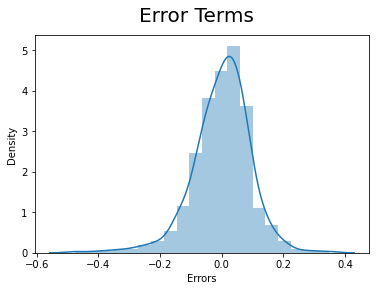

In [118]:
# To check whether the error terms are normally distributed, plot the histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 10)                         
plt.show()

#### Inferences : Error terms are normally distributed with mean 0.0 

### f. Making Predictions Using the Final Model (MODEL 8)

__Now that we have fitted the model and checked the normality of error terms, Let us make predictions using the final model, i.e. MODEL 8.__<br>
__Apply the same pre-processing steps for test set as we did for train set.__

In [119]:
# Rescale features of test set
# Apply scaler() to the columns 'temp','hum','windspeed','cnt'

scale_vars = ['temp','hum','windspeed','cnt']

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

In [120]:
# First 5 records of the test set after scaling
# All values of the test set now ranges from 0 to 1

df_test.head()

,Spring,Summer,Winter,Light Snow or Rain,Misty,End of Month,Mid Month,Monday,Saturday,Sunday,...,November,October,September,yr,holiday,workingday,temp,hum,windspeed,cnt
202,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,0.998765,0.404375,0.281808,0.387138
497,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1,0,0,0.700309,0.397995,0.515761,0.701335
370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,1,0.348148,0.346195,0.370300,0.468937
630,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1,0,0,0.595062,0.232265,0.511204,0.907156
646,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1,0,1,0.490432,0.679781,0.427269,0.732858


#### Defining X_test and y_test

In [121]:
y_test = df_test.pop('cnt')
X_test = df_test

In [122]:
# Add only the features selected in Model 8 to the predictor dataframe of test set

X_test_new = X_test[X_train_model_8.columns]

In [123]:
# Adding constant variable to X_test 

X_test_new = sm.add_constant(X_test_new)

In [124]:
# Making predictions using MODEL 8

y_test_pred = lm_8.predict(X_test_new)

## 5. MODEL EVALUATION

Text(0, 0.5, 'y_test_pred')

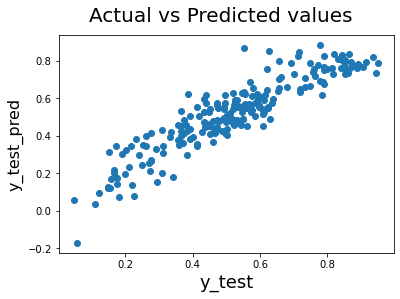

In [125]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('Actual vs Predicted values', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)      

### Inference from the scatter plot of 'Actual vs Predicted values' of target variable 'cnt':
It is evident that there’s a __strong correlation__ between the model’s predictions and its actual results, which means the model is much more __accurate__.<br>

### Validation of ASSUMPTION 1 - Linearity Check 

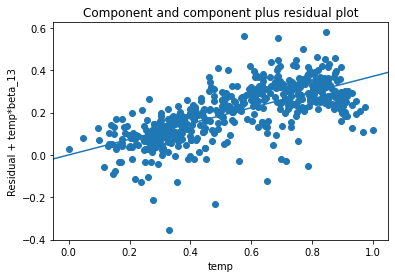

In [126]:
# Component and component plus residual plot

sm.graphics.plot_ccpr(lm_8, 'temp')
plt.show()

#### Inference :
The plot of temp with its corresponding predicted coefficient for demand shows that the predictor and the target variable are linearly related<br> __[Linear relationship between X and y - ASSUMPTION No.1 VALIDATED ]__

In [127]:
df = pd.concat([X_train_model_8,BikeSharing['cnt']], axis = 1)

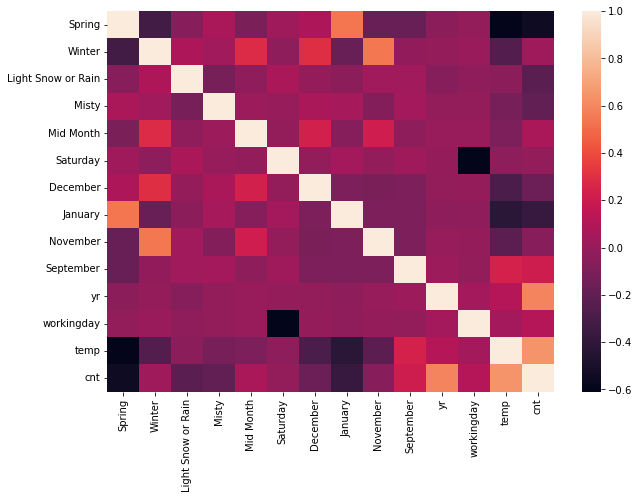

In [128]:
# Analysing the correlation of predictors from final model with the target variable using heatmap

plt.figure(figsize = (10,7))
sns.heatmap(df.corr())
plt.show()

### Inference from the heatmap of predictors from the final model and the target variable :
Heatmap shows that the target variable 'cnt' is correlated with the predictors from the final model either positively or negatively __[ASSUMPTION No.1 VALIDATED]__

### Validation of ASSUMPTION 2 - Error terms are normally distributed

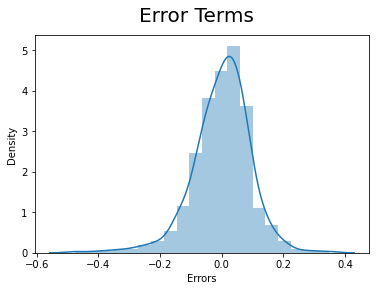

In [129]:
# To check whether the error terms are normally distributed, plot the histogram of error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 10)                         
plt.show()

#### Inferences : Error terms are normally distributed with mean 0.0 [ASSUMPTION No.2 - VALIDATED]

### Validation of ASSUMPTION 3 - Error terms are independent to each other

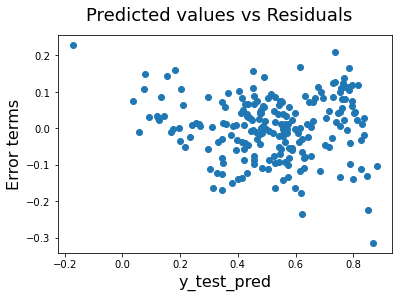

In [130]:
# Scatter plot for 'y_test_pred' vs 'errors'
# Residual = Actual value - Predicted value

res = y_test-y_test_pred
fig = plt.figure()
plt.scatter(y_test_pred,res)
fig.suptitle('Predicted values vs Residuals', fontsize = 18)             
plt.xlabel('y_test_pred', fontsize = 16)                          
plt.ylabel('Error terms', fontsize = 16)   
plt.show()

### Inference from the scatter plot of 'Predicted values vs Residuals' :
__No specific patterns__ observed from the scatter plot of 'Predicted value' vs 'Residuals'. Thus, it shows that __the error terms are independent__ to each other with respect to predicted values __[ASSUMPTION No.3 - VALIDATED]__

### Validation of ASSUMPTION 4 - Homoscedasticity

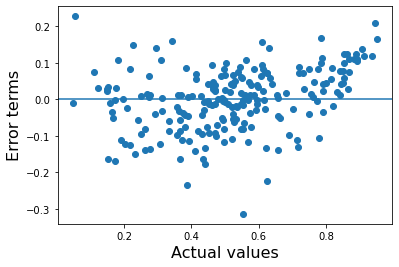

In [131]:
# Scatter plot for Actual values in test set vs residuals
# This is plotted to prove 'homoscedasticity', which is one of the assumptions made for building linear regression model

residuals = y_test - y_test_pred 
plt.scatter(x=y_test, y=residuals)
plt.axhline(0)
fig.suptitle('Actual values vs Residuals', fontsize = 18)             
plt.xlabel('Actual values', fontsize = 16)                          
plt.ylabel('Error terms', fontsize = 16)   
plt.show()

### Inference from the scatter plot of 'Actual values vs Residuals' :
 The plot __doesnot show any specific cone or wedge shape__. Hence, it is clear that the variance of the error terms remain constant along the values of the dependent variable; i.e.; __homoscedasticity__ exists __[ASSUMPTION No. 4 - VALIDATED]__

### R - Squared 
__R-squared (R2)__ is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by independent variables in a regression model. __R-squared__ is a __relative measure__ of fit.

In [132]:
# Find out the R squared values of actual predicted values of train set and test set

print("R - squared value for train set : ",r2_score(y_train,y_train_pred))
print("R - squared value for test set : ",r2_score(y_test,y_test_pred))

R - squared value for train set :  0.8287460725636523
R - squared value for test set :  0.8305715157778124


__Inference - R - squared values of the test set (83.05%) and train set (82.87%) are significantly good__

### Root Mean Squared Error (RMSE)
Root Mean Squared Error (RMSE) indicates the absolute fit of the model to the data – __how close the observed data points are to the model’s predicted values.__ __RMSE__ is an __absolute measure__ of fit. Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response.

In [133]:
# Root Mean Squared Error (RMSE)

print("Root Mean Squared Error of the model is given by : ",np.sqrt(mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error of the model is given by :  0.08508689737842606


#### Inference - Since RMSE of our model is very low, the model fit is very good in predicting the response

### Plot for Error terms 

In [134]:
# Function for plotting error terms

def plot_err_terms(actual,predicted):
    c = [i for i in range(1,len(y_test)+1,1)]
    fig = plt.figure(figsize=(10,5))
    plt.plot(c,actual-predicted, color="red", marker='o', linewidth=1, linestyle="")
    fig.suptitle('Error Terms', fontsize=18)               
    plt.xlabel('Index', fontsize=16)                      
    plt.ylabel('Actual demand - Predicted demand', fontsize=16)              

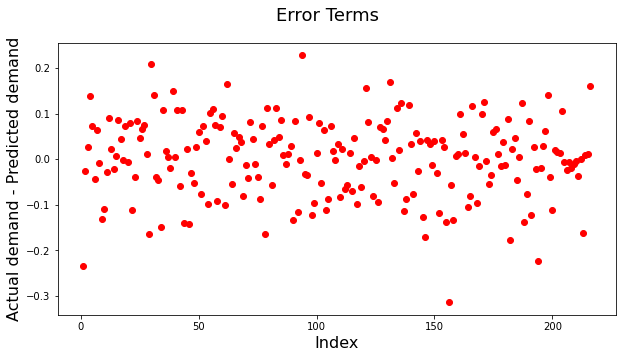

In [135]:
# Plot error terms for test data

plot_err_terms(y_test,y_test_pred)

#### Inference - No pattern observed which means the output is explained well by the model.

### Plot for Actual and Predicted demand of test set

In [136]:
# Function to plot Actual vs Predicted 
# Plot of Actual and predicted values with respect to index

def plot_actual_predicted(actual,predicted):
    c = [i for i in range(1,len(y_test)+1,1)]
    fig = plt.figure(figsize=(10,4))
    plt.plot(c,actual, color="blue", linewidth=2, linestyle="-")
    plt.plot(c,predicted, color="green",  linewidth=2, linestyle="-")
    fig.suptitle('Actual and Predicted demand Vs Index', fontsize=18)              
    plt.xlabel('Index', fontsize=16)                               
    plt.ylabel('Demand', fontsize=16)                               

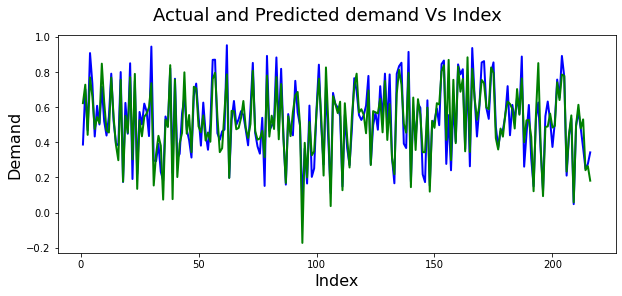

In [137]:
plot_actual_predicted(y_test,y_test_pred)

__Inference - The plot shows that the actual and predicted values are very close to each other__

## 6. INTERPRETATION OF RESULTS
Based on the built linear regression model, __BoomBikes__ company should focus on the following features :

- It would be better to focus on how to expand business during __Spring__ by advertising special offers and discounts planned for the season.<br><br>
- Company can improve business by encouraging the customers through __'year end' offers__ and __special free rides__ based on lot - system so that the business doesnot drop down during 'year-end' period,  __(i.e. September to December)__.<br><br>
- Rental bikes are not preffered when the weather is __misty, snowy or rainy__. In these situations, company can improve the business by providing __Waterproof Bike Shield Covers__ to the customers so that they wont be drenched in rain or snow.<br><br> 
- Based on the __demographical data, weather and season__, the spread of the number of bikes over 'docks' has to be determined so that the __available resources are utilized well__.<br><br>
- Every end of the month there is a __decline__ in bike sharing users. This may be due to the insufficient monetary trends at the __month-end__. Hence, give some flexible time for payment based on the membership and profile of the users. 


### Significant features to predict the DEMAND for shared bikes are :  <br>
1. Season (Spring, Winter)
2. Weather (Light Snow or Rain, Misty)
3. Mid Month
4. Weekday (Saturday)
5. Month (January, September, November, December)
6. Year
7. Workingday
8. Temperature

### Coefficients of the significant variables (how well these variables describe the bike demands) : 

Coefficient of the feature - Spring             : -0.11549906427979702<br>
Coefficient of the feature - Winter             :  0.07107811036970689<br>
Coefficient of the feature - Light Snow or Rain : -0.32528257723638254<br>
Coefficient of the feature - Misty              : -0.07913116256968115<br>
Coefficient of the feature - Mid Month          :  0.04039813583014747<br>
Coefficient of the feature - Saturday           :  0.06440997256785737<br>
Coefficient of the feature - December           : -0.07308927186144788<br>
Coefficient of the feature - January            : -0.05750498734447426<br>
Coefficient of the feature - November           : -0.09136891118991015<br>
Coefficient of the feature - September          :  0.049971247277551374<br>
Coefficient of the feature - yr                 :  0.2343096537075494<br>
Coefficient of the feature - workingday         :  0.058977436299761675<br>
Coefficient of the feature - temp               :  0.3714075618040843<br>
Intercept value of the built model              :  0.1925153799731144 

### The linear equation for predicting the demand for shared bike is given by :<br>
__DEMAND__ = (-0.11549906427979702 X __SPRING__) + (0.07107811036970689 X __WINTER__) + (-0.32528257723638254 X __LIGHT SNOW OR RAIN__) +<br>&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; (-0.07913116256968115 X __MISTY__) + (0.04039813583014747 X __MID MONTH__) + (0.06440997256785737 X __SATURDAY__) +<br>&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; (-0.07308927186144788 X __DECEMBER__) + (-0.05750498734447426 X __JANUARY__) + (-0.09136891118991015 X __NOVEMBER__) +<br>&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; (0.049971247277551374 X __SEPTEMBER__) + (0.2343096537075494 X __YEAR__) + (0.058977436299761675 X __WORKINGDAY__) +<br>&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; (0.3714075618040843 X __TEMP__) + 0.1925153799731144